In [1]:
import pandas as pd 

In [2]:
import statistics

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
# it contains regression results by using metacritic albums
filename = "results/result_2019-12-10_18-32-10/regression_MetacriticAlbums_results.csv"

In [6]:
data = pd.read_csv(filename, keep_default_na=False)

In [7]:
data.head()

,task_name,gold_standard_file,model_name,model_configuration,root_mean_squared_error
0,Regression,MetacriticAlbums,KNN,K=3,12.078667
1,Regression,MetacriticAlbums,KNN,K=3,12.103673
2,Regression,MetacriticAlbums,KNN,K=3,12.146482
3,Regression,MetacriticAlbums,KNN,K=3,12.049240
4,Regression,MetacriticAlbums,KNN,K=3,12.057659


In [8]:
# the best method able to manage metacritic albums
best_result = data[data.root_mean_squared_error==min(data.root_mean_squared_error)]

In [9]:
best_result

,task_name,gold_standard_file,model_name,model_configuration,root_mean_squared_error
22,Regression,MetacriticAlbums,LR,,11.524901


In [10]:
# the worst method in working with metacritic albums
worst_result = data[data.root_mean_squared_error==max(data.root_mean_squared_error)]

In [11]:
worst_result

,task_name,gold_standard_file,model_name,model_configuration,root_mean_squared_error
18,Regression,MetacriticAlbums,M5,,17.127402


In [12]:
models = data.model_name.unique()

In [13]:
models_df = pd.DataFrame([], columns=['id', 'approach', 'conf', 'min', 'max', 'mean', 'standard_dev'])

In [14]:
# it calculates the min, max, average and standard deviation for each model and, if more configuration are tested, for each conf
for m in models:
    model_data = data[data['model_name']==m]
    model_configurations = model_data.model_configuration.unique()

    if len(model_configurations)>1:
        for conf in model_configurations:
            model_data_conf = model_data[model_data['model_configuration']==conf]
            model_rmse = model_data_conf.root_mean_squared_error
            min_rmse = min(model_rmse)
            max_rmse = max(model_rmse)
            mean_rmse = sum(model_rmse)/len(model_rmse)
            stdev_rmse = statistics.stdev(model_rmse)
            model_id = m+' '+conf
            
            values = {'id' : model_id, 'approach' : m, 'conf' : conf, 
                      'min':min_rmse, 'max':max_rmse, 'mean':mean_rmse, 'standard_dev':stdev_rmse}
            models_df = models_df.append(values, ignore_index=True)
            
    else:
        conf = model_configurations[0]
            
        model_rmse = model_data.root_mean_squared_error
        min_rmse = min(model_rmse)
        max_rmse = max(model_rmse)
        mean_rmse = sum(model_rmse)/len(model_rmse)
        stdev_rmse = statistics.stdev(model_rmse)
        model_id = m+' '+conf
    
        values = {'id' : model_id, 'approach' : m, 'conf' : conf, 
                  'min':min_rmse, 'max':max_rmse, 'mean':mean_rmse, 'standard_dev':stdev_rmse}
        models_df = models_df.append(values, ignore_index=True)   

In [15]:
models_df

,id,approach,conf,min,max,mean,standard_dev
0,KNN K=3,KNN,K=3,12.025971,12.172480,12.091682,0.045341
1,M5,M5,,16.471955,17.127402,16.832133,0.185051
2,LR,LR,,11.524901,11.711090,11.611136,0.059974


([0, 1, 2], <a list of 3 Text xticklabel objects>)

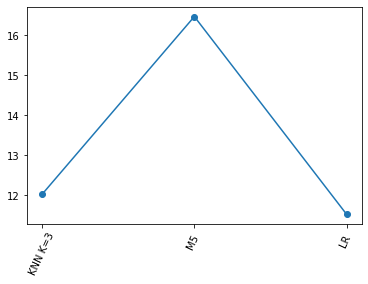

In [16]:
# it plots the min values for the RMSE (root mean squared error)
plt.plot(models_df.id, models_df['min'], marker = 'o')
plt.xticks(rotation=65)
#plt.grid(True)

([0, 1, 2], <a list of 3 Text xticklabel objects>)

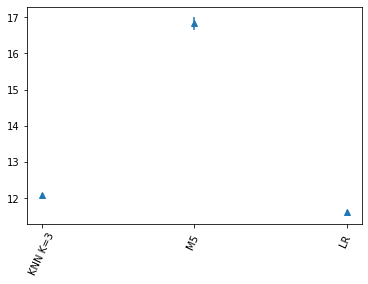

In [17]:
# it plots the mean and the standard deviation
plt.errorbar(models_df.id, models_df['mean'], models_df['standard_dev'], linestyle='None', marker='^')
plt.xticks(rotation=65)
#plt.grid(True)

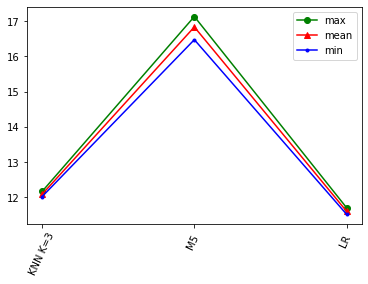

In [18]:
plt.plot(models_df.id, models_df['max'], marker = 'o', color='green')
plt.plot(models_df.id, models_df['mean'], marker = '^', color='red')
plt.plot(models_df.id, models_df['min'], marker = '.', color='blue')
plt.xticks(rotation=65)
plt.legend(('max', 'mean', 'min'))
#plt.grid(True)